# Process BOLFI reconstructed positions
First test, all default settings

*Bart Pelssers, 25-04-2018*

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
plt.rc('font', size=16)

In [4]:
def load_files(filename, model = 'FM2'):
    data = defaultdict(list)
    algos_set = False
    for i in range(1001):
        try:
            with open(filename % i, 'rb') as f:
                single = pickle.load(f)
        except:
            continue
        if not algos_set:
            algos = list(single.keys())
            algos_set = True
        for k, v in single.items():
            if not k.endswith('_e'):
                for dim in ['x', 'y']:
                    data[k + '_' + dim].append(v[dim])
            elif k.endswith('n_e'):
                data[k].append(v['e'])
            elif k.endswith('x_e'):
                data[k].append(v)

    algos.remove('truth')
    
    if model == 'FM3':
        algos.remove('BOLFI_median_e')
        algos.remove('BOLFI_mean_e')
        algos.remove('pax_e')
        
    df = pd.DataFrame(data)
    df['truth_r'] = (df['truth_x']**2 + df['truth_y']**2)**0.5
    
    print('Mean distance from true position over %d reconstructed events' % len(df))
    for algo in algos:
        df[algo + '_d'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2)**0.5
        print(algo, "%.2f cm" % df[algo + '_d'].mean())
    
    return df, algos

In [5]:
#filename = "bolfi_results_run3_llcs_deadpmts/bolfi_result_%d.pkl"  # 500            # BOLFI_mean 0.98 cm, TPF 0.71 cm
#filename = "bolfi_results_run4_llcs_deadpmts/pkl/bolfi_result_%d.pkl"  # 1, 500     # BOLFI_mean 0.76 cm, TPF 0.68 cm
#filename = "bolfi_results_run5_cosine/pkl/bolfi_result_%d.pkl"  # 36                # BOLFI_mean 0.88 cm, TPF 0.82 cm
#filename = "bolfi_results_run6_sqeuclidean/pkl/bolfi_result_%d.pkl"  # 1, 637       # BOLFI_mean 1.13 cm, TPF 0.64 cm
#filename = "bolfi_results_run7_all_pmts/pkl/bolfi_result_%d.pkl"  # 243             # BOLFI_mean 1.13 cm, TPF 0.64 cm
#filename = "bolfi_results_run10/bolfi_result_%d.pkl"  # 244
#filename = "bolfi_results_run11/bolfi_result_%d.pkl"  # 39, all pmts on, eucli
#filename = "bolfi_results_run12/bolfi_results_%d.pkl"  # 58, all pmts on, eucli
#filename = "bolfi_results_run13/bolfi_results_%d.pkl"  # , all pmts on, cosine
#filename = "bolfi_results_run14/bolfi_results_%d.pkl"  # , all pmts on, max distance
#filename = "bolfi_results_run15/bolfi_results_%d.pkl"  # , all pmts on, correlation distance
#filename = "bolfi_results_run16/bolfi_results_%d.pkl"  # , all pmts on, correlation distance, s2_electrons=10
#filename = "bolfi_results_run18/bolfi_results_%d.pkl"  # , all pmts on, correlation distance, warmup=200
#filename = "bolfi_results_run19/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis, n_evidence=300  1000 events BENCHMARK
#filename = "bolfi_results_run20/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis, n_evidence=300, z=-50
#filename = "bolfi_results_run21/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis, n_evidence=300, z=-50, outer30 positions
#filename = "bolfi_results_run22/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis, n_evidence=300, z=0, s2_electrons=50
#filename = "bolfi_results_run23/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis, n_evidence=300, z=0, s2_electrons=10
#filename = "bolfi_results_run24/bolfi_results_%d.pkl"  # , all pmts on, euclidean, n_evidence=300, z=0, s2_electrons=25, initial_evidence=50, INCLUDE TIMINGS
#filename = "bolfi_results_run25/bolfi_results_%d.pkl"  # , all pmts on, max(bc_e, bc_t), n_evidence=300, z=0, s2_electrons=25, initial_evidence=50, INCLUDE TIMINGS, using sumwf instead of hits
#filename = "bolfi_results_run26/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=25, initial_evidence=50, INCLUDE TIMINGS, using sumwf instead of hits
#filename = "bolfi_results_run27/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=25, initial_evidence=50, times, noise_var = 1, top hp
#filename = "bolfi_results_run28/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=10, initial_evidence=50, times, noise_var = 1, full hp, w lces
#filename = "bolfi_results_run29/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=10, initial_evidence=50, times, noise_var = 1, top hp

#filename = "bolfi_results_run30/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=25, initial_evidence=50, times, noise_var = 5, top hp
#filename = "bolfi_results_run31/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=10, initial_evidence=50, times, noise_var = 5, top hp
#filename = "bolfi_results_run32/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=25, initial_evidence=50, times, noise_var = 5, top hp, caching test r=0.3
#filename = "bolfi_results_run33/bolfi_results_%d.pkl"  # , all pmts on, bray-curtis 1D, n_evidence=300, z=0, s2_electrons=1, initial_evidence=50, times, noise_var = 5, top hp

#filename = "bolfi_results_run34/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=25, init_ev=50, times, noise_var = 10,5,5, full hp, 3D
#filename = "bolfi_results_run35/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=25, init_ev=50, times, noise_var = 10,5,5, full hp, 3D (with pax_e), GOOD (e on true pos)
#filename = "bolfi_results_run36/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=10, init_ev=50, times, noise_var = 10,5,5, full hp, 3D (with pax_e)
#filename = "bolfi_results_run37/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=25, init_ev=50, times, noise_var = 10,5,5, full hp, 3D (with pax_e), truncnorm prior
#filename = "bolfi_results_run38/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=25, init_ev=50, times, noise_var = 10,5,5, full hp, 3D (with pax_e), (e on pax pos, using full model not min_model)
#filename = "bolfi_results_run39/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=25, init_ev=50, times, noise_var = 5,5,5, ET->x,y,e, fix pax_e (add double_pe)
#filename = "bolfi_results_run40/bolfi_results_%d.pkl"  # , all pmts on, n_ev=300, z=0, s2_elec=25, init_ev=50, times, noise_var = 5,5,5, ET->x,y,e, fix pax_e (add double_pe) model not min_model (no diff keep using min_model)

## RUNS FOR THE PAPER PLOTS
#filename = "FM2_full_bc_25/bolfi_results_%d.pkl"
#filename = "FM2_full_bc_10/bolfi_results_%d.pkl"
#filename = "FM2_full_eu_25/bolfi_results_%d.pkl"
#filename = "FM2_full_eu_10/bolfi_results_%d.pkl"

#filename = "FM3_bc_25/bolfi_results_%d.pkl"

filename = "FM3_test/bolfi_results_%d.pkl"

In [6]:
df, algos = load_files(filename, 'FM3')
df.head()

Mean distance from true position over 122 reconstructed events
BOLFI_median 0.84 cm
PosRecTopPatternFit 0.84 cm
PosRecNeuralNet 1.06 cm
BOLFI_mean 0.85 cm
BOLFI_mode 3.25 cm


,BOLFI_mean_e,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_e,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,...,PosRecTopPatternFit_y,pax_e,truth_x,truth_y,truth_r,BOLFI_median_d,PosRecTopPatternFit_d,PosRecNeuralNet_d,BOLFI_mean_d,BOLFI_mode_d
0,25.816541,-11.773843,-7.755480,25.846098,-11.852590,-7.729311,-12.942140,-6.000042,-12.040373,-8.486483,...,-7.560691,24.552323,-12.03792,-6.37732,13.622838,1.364635,1.193718,2.109165,1.403232,0.979771
1,26.019891,-25.687966,-37.568709,25.917708,-25.523993,-37.702493,-28.830723,-38.155069,-26.166091,-39.117037,...,-39.243586,27.732174,-27.13142,-39.00569,47.513764,2.069335,0.439018,0.971729,2.036780,1.900313
2,26.823941,-7.921254,-10.973334,26.750066,-8.021545,-10.887171,-8.273894,-9.368150,-7.201762,-10.925395,...,-10.920998,23.470864,-7.94757,-10.92799,13.512396,0.084489,0.386942,0.745812,0.052427,1.593608
3,25.724486,-34.827101,-7.970329,25.695964,-34.808780,-7.990435,-40.369658,-10.527578,-34.023910,-6.556673,...,-8.280757,24.017404,-35.66363,-8.05283,36.561490,0.857124,1.241583,2.219722,0.840587,5.317056
4,25.292036,4.327893,-44.129064,25.201612,4.146849,-44.364305,7.783712,-46.905359,5.482328,-44.611434,...,-44.044024,24.034840,5.35138,-43.30615,43.635535,1.603305,0.997314,1.311836,1.313283,4.344024


In [42]:
df_bc_25, algos_1 = load_files("FM2_full_bc_25/bolfi_results_%d.pkl", 'FM2')
df_bc_10, algos_2 = load_files("FM2_full_bc_10/bolfi_results_%d.pkl", 'FM2')
df_eu_25, algos_3 = load_files("FM2_full_eu_25/bolfi_results_%d.pkl", 'FM2')
df_eu_10, algos = load_files("FM2_full_eu_10/bolfi_results_%d.pkl", 'FM2')
assert algos_1 == algos_2 == algos_3 == algos

Mean distance from true position over 1000 reconstructed events
BOLFI_mean 0.74 cm
PosRecTopPatternFit 0.83 cm
BOLFI_mode 1.42 cm
BOLFI_median 0.74 cm
PosRecNeuralNet 1.10 cm
Mean distance from true position over 1000 reconstructed events
BOLFI_mean 1.09 cm
PosRecTopPatternFit 1.20 cm
BOLFI_mode 2.04 cm
BOLFI_median 1.09 cm
PosRecNeuralNet 1.59 cm
Mean distance from true position over 1000 reconstructed events
BOLFI_mean 0.79 cm
PosRecTopPatternFit 0.74 cm
BOLFI_mode 1.30 cm
BOLFI_median 0.79 cm
PosRecNeuralNet 1.02 cm
Mean distance from true position over 999 reconstructed events
BOLFI_mean 1.16 cm
PosRecTopPatternFit 1.17 cm
BOLFI_mode 1.91 cm
BOLFI_median 1.16 cm
PosRecNeuralNet 1.60 cm


In [43]:
df_eu_25.head()

,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,PosRecTopPatternFit_x,PosRecTopPatternFit_y,truth_x,truth_y,truth_r,BOLFI_mean_d,PosRecTopPatternFit_d,BOLFI_mode_d,BOLFI_median_d,PosRecNeuralNet_d
0,-12.495992,-6.233081,-12.470425,-6.219885,-12.835757,-5.780553,-12.379793,-6.050189,-12.094612,-6.109649,-12.03792,-6.37732,13.622838,0.480244,0.273609,0.996331,0.460268,0.473172
1,-26.985216,-37.728942,-26.977843,-37.760736,-27.707491,-38.956387,-27.250670,-38.227724,-26.807644,-38.029449,-27.13142,-39.00569,47.513764,1.285092,1.028532,0.578177,1.254391,0.787053
2,-8.357214,-9.751989,-8.328775,-9.762351,-9.489057,-10.863517,-7.700568,-11.559002,-8.104637,-10.348997,-7.94757,-10.92799,13.512396,1.245305,0.599919,1.542835,1.226389,0.677633
3,-34.879684,-7.675558,-34.894046,-7.737274,-34.203210,-5.822674,-35.091248,-7.548489,-34.288847,-7.356516,-35.66363,-8.05283,36.561490,0.870003,1.541065,2.665787,0.831766,0.762877
4,4.762119,-43.378906,4.804025,-43.339681,3.978812,-45.105248,4.940731,-42.856977,5.361529,-43.016917,5.35138,-43.30615,43.635535,0.593735,0.289411,2.262896,0.548381,0.608596


In [44]:
## Calculate the FDC corrected TPF position
#
## Load map
#from pax.InterpolatingMap import InterpolatingMap
#
#fdc_map = InterpolatingMap(filename='/home/bart/repositories/pax/pax/data/XENON1T_FDC_SR1_AdCorrTPF.json.gz')
#
#df['TPF_r'] = (df['PosRecTopPatternFit_x']**2 + df['PosRecTopPatternFit_y']**2)**0.5
## Add TPF_fdc_x, TPF_fdc_y to dataframe
#for idx, row in df.iterrows():
#    df.loc[idx, 'TPF_r_cor'] = fdc_map.get_value(row['TPF_r'], -50, map_name = 'to_true_r')
#
## Calc TPF_fdc_d
#df['TPF_cor_x'] = (df['TPF_r'] + df['TPF_r_cor']) * df['PosRecTopPatternFit_x'] / df['TPF_r']
#df['TPF_cor_y'] = (df['TPF_r'] + df['TPF_r_cor']) * df['PosRecTopPatternFit_y'] / df['TPF_r']
#
#df['TPF_cor_d'] = ((df['TPF_cor_x'] - df['truth_x'])**2 + (df['TPF_cor_y'] - df['truth_y'])**2)**0.5 

#algos += ['TPF_cor']

In [45]:
algos

['BOLFI_mean',
 'PosRecTopPatternFit',
 'BOLFI_mode',
 'BOLFI_median',
 'PosRecNeuralNet']

In [288]:
#df = df[df['BOLFI_mean_d'] < 10]
df = df[df['truth_r'] > 30]

In [11]:
df['truth_r'].min()

1.0729225953907393

In [12]:
# ratio of 7x7 cm patch to entire x,y space. 
np.pi * 47.9**2 / 7**2

147.10411429230524

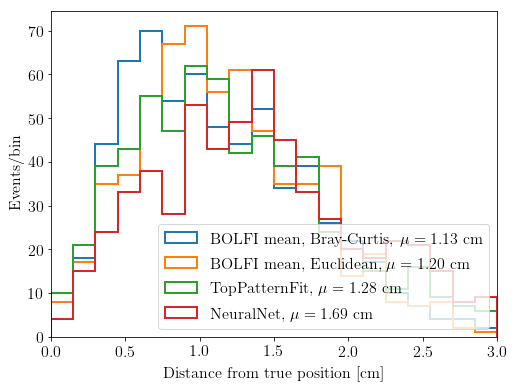

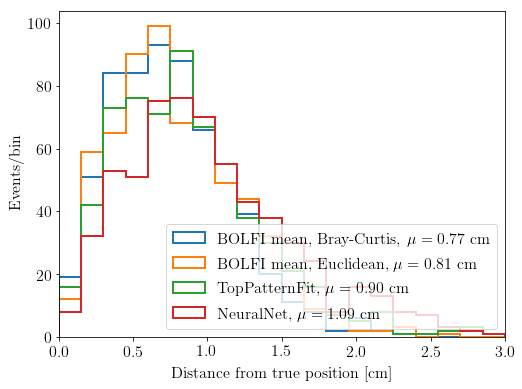

In [61]:
nbins = 20

# FM2 paper plots s2_electrons = 10
plt.figure(figsize=(8,6))
for algo in algos:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_eu_10
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', $\mu=%.2f$ cm' % mu)
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_bc_10
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', $\mu=%.2f$ cm' % mu)
    else:
        pl_df = df_bc_10
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Bray-Curtis, $\mu=%.2f$ cm' % mu)
        
        pl_df = df_eu_10
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Euclidean, $\mu=%.2f$ cm' % mu)
plt.legend(loc='lower right')
plt.xlabel('Distance from true position [cm]')
plt.ylabel('Events/bin')
plt.xlim(0, 3)
plt.savefig('FM2_full_s2_electrons_10_r_30.png', bbox_inches='tight', dpi=150)
plt.show()

# FM2 paper plots s2_electrons = 25
plt.figure(figsize=(8,6))
for algo in algos:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_eu_25
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', $\mu=%.2f$ cm' % mu)
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_bc_25
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', $\mu=%.2f$ cm' % mu)
    else:
        pl_df = df_bc_25
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Bray-Curtis, $\mu=%.2f$ cm' % mu)
        
        pl_df = df_eu_25
        pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=(0, 3), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Euclidean, $\mu=%.2f$ cm' % mu)
plt.legend(loc='lower right')
plt.xlabel('Distance from true position [cm]')
plt.ylabel('Events/bin')
plt.xlim(0, 3)
plt.savefig('FM2_full_s2_electrons_25_r_30.png', bbox_inches='tight', dpi=150)
plt.show()

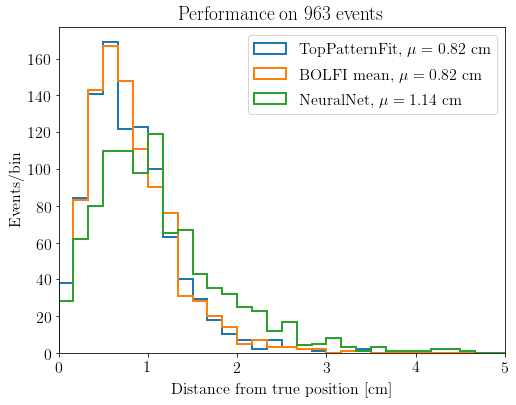

In [13]:
plot_df = df#[df['truth_r'] > 30]

plt.figure(figsize=(8,6))
for algo in algos:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    mu = plot_df[algo + '_d'].mean()
    plt.hist(plot_df[algo + '_d'], bins = 30, range=(0, 5), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', $\mu=%.2f$ cm' % mu)
plt.legend()
plt.xlabel('Distance from true position [cm]')
plt.ylabel('Events/bin')
plt.xlim(0, 5)
#plt.ylim(0, 50)
#plt.ylim(0, 150)
#plt.title('Performance on %d events, all PMTs on, $R_{truth} > 25$ cm' % len(plot_df)) # $R_{truth} > 30$ cm' % len(plot_df))
#plt.title('Performance on %d events, $R_{truth} > 30$ cm' % len(plot_df))
#plt.title('Performance on %d events, all PMTs on, z=-50 cm' % len(plot_df))
plt.title('Performance on %d events' % len(plot_df))  #, all PMTs on, 30 [cm] $<$ R $<$ 45 [cm]' % len(plot_df))
#plt.savefig('bolfi_run21_pmtson_z50.png', dpi=150)
#plt.savefig('bolfi_run19_pmtson.png', dpi=150)
#plt.savefig('fm2_run31_lowe.png', dpi=150)
#plt.savefig('fm3_run35_45cm.png', dpi=150)
#plt.savefig('FM2_bc_10.png')
plt.show()

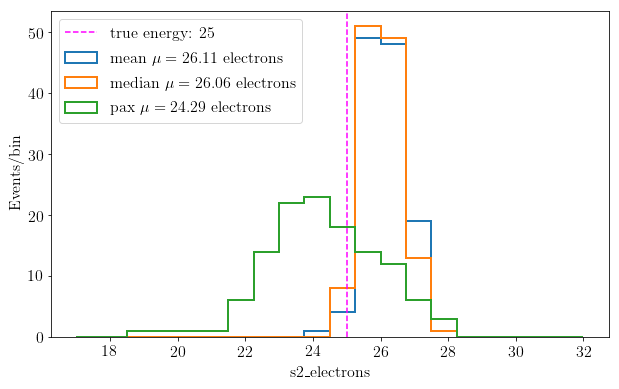

In [8]:
plt.figure(figsize=(10, 6))
mu = (df['BOLFI_mean_e']).mean()
plt.hist(df['BOLFI_mean_e'], bins=20, range=(17, 32), histtype='step', linewidth=2, label='mean $\mu=%.2f$ electrons' % mu)
mu = (df['BOLFI_median_e']).mean()
plt.hist(df['BOLFI_median_e'], bins=20, range=(17, 32), histtype='step', linewidth=2, label='median $\mu=%.2f$ electrons' % mu)
mu = (df['pax_e']).mean()
plt.hist(df['pax_e'], bins=20, range=(17, 32), histtype='step', linewidth=2, label='pax $\mu=%.2f$ electrons' % mu)

#plt.hist(df['pax_e'] * 21.3 / 23, bins=20, range=(22, 32), histtype='step', linewidth=2, label='pax 2 $\mu=%.2f$ electrons' % mu)
plt.axvline(25, color='magenta', linestyle='--', label='true energy: 25')
plt.legend(loc='upper left')
#plt.ylim(0, 50)
plt.xlabel('s2\_electrons')
plt.ylabel('Events/bin')
#plt.savefig('fm3_e_test.png', dpi=150)
plt.show()

In [15]:
df.head()

,BOLFI_mean_e,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_e,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,...,PosRecTopPatternFit_y,pax_e,truth_x,truth_y,truth_r,PosRecTopPatternFit_d,BOLFI_mean_d,BOLFI_mode_d,BOLFI_median_d,PosRecNeuralNet_d
0,26.745179,-11.958503,-5.961988,26.551632,-11.907511,-5.990963,-10.324192,-9.376817,-11.787287,-6.574634,...,-5.880537,24.626287,-12.03792,-6.37732,13.622838,0.807717,0.422856,3.454540,0.407773,0.318983
1,24.917910,-26.465012,-37.621529,24.662073,-26.445881,-37.745615,-29.426727,-40.885949,-26.519103,-38.198473,...,-39.243586,22.780024,-27.13142,-39.00569,47.513764,0.262546,1.536230,2.967121,1.434487,1.013179
2,25.753655,-8.787762,-10.940555,25.731819,-8.747203,-10.957129,-8.860925,-11.913118,-7.884317,-11.699007,...,-11.161020,23.864219,-7.94757,-10.92799,13.512396,0.845959,0.840286,1.343389,0.800164,0.773608
3,25.936370,-35.497588,-7.960365,25.934008,-35.504774,-7.972267,-34.956902,-6.541856,-36.325201,-7.215744,...,-7.560691,23.803881,-35.66363,-8.05283,36.561490,0.556782,0.190052,1.668085,0.178117,1.066953
4,29.226405,5.316638,-42.923291,29.090367,5.318724,-43.123228,1.668096,-46.882411,4.994916,-42.532386,...,-43.083936,25.708544,5.35138,-43.30615,43.635535,0.573922,0.384432,5.133831,0.185814,0.851926


In [16]:
(df['BOLFI_mean_d'] - df['PosRecTopPatternFit_d']).mean()

0.0008116445440353169

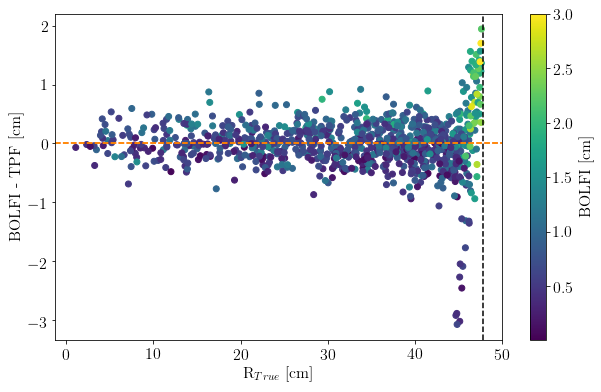

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['truth_r'], df['BOLFI_mean_d'] - df['PosRecTopPatternFit_d'], c=df['BOLFI_mean_d'], vmax=3, label='mean')
plt.colorbar(label='BOLFI [cm]')
#plt.scatter(df['truth_r'], df['BOLFI_median_d'] - df['PosRecTopPatternFit_d'], label='median')
#plt.scatter(df['truth_r'], df['BOLFI_mode_d'] - df['PosRecTopPatternFit_d'], label='mode')
#plt.scatter(df['truth_r'], df['BOLFI_mean_d'], label='BOLFI mean')
#plt.scatter(df['truth_r'], df['BOLFI_median_d'], label='BOLFI median')
#plt.scatter(df['truth_r'], df['BOLFI_mode_d'], label='BOLFI mode')
plt.axhline(0, color='red', linestyle='--')
plt.axhline((df['BOLFI_mean_d'] - df['PosRecTopPatternFit_d']).mean(), color='orange', linestyle='--')
plt.axvline(47.9, color='k', linestyle='--')
#plt.axvline(df['truth_r'][-1:].values, color='b', linestyle='--')
#plt.axhline(0.5, color='red', linestyle='--')
#plt.axhline(-0.5, color='red', linestyle='--')
#plt.ylim(-1.5, 1.5)
#plt.legend()
plt.xlabel(r'R$_{True}$ [cm]')
plt.ylabel('BOLFI - TPF [cm]')
#plt.savefig('FM2_bolfi_tpf_bc_10.png', dpi=150)
plt.show()

In [325]:
bins = np.linspace(0, 47.9, 8)
groups = df.groupby(pd.cut(df.truth_r, bins))

In [326]:
bin_centers = (bins[:-1] + bins[1:])/2

In [327]:
bin_centers

array([ 3.42142857, 10.26428571, 17.10714286, 23.95      , 30.79285714,
       37.63571429, 44.47857143])

In [328]:
bin_means = defaultdict(list)
bin_stds = defaultdict(list)
bin_vectors = defaultdict(list)
bin_counts = defaultdict(list)
for gid, group in groups:
    for algo in algos:
        bin_counts[algo].append(group[algo + '_d'].count())
        bin_means[algo].append(group[algo + '_d'].mean())
        bin_stds[algo].append(group[algo + '_d'].std())
        bin_vectors[algo].append(group[algo + '_d'].values)

In [329]:
bin_means['PosRecTopPatternFit']
#bin_means['TPF_cor']

[1.0501092306076274,
 1.0231622509617988,
 1.054410907946298,
 1.1286263087543784,
 1.0752095499820387,
 1.107719360327164,
 1.4952330849362845]

In [330]:
bin_counts['PosRecTopPatternFit']

[24, 57, 84, 129, 168, 227, 280]

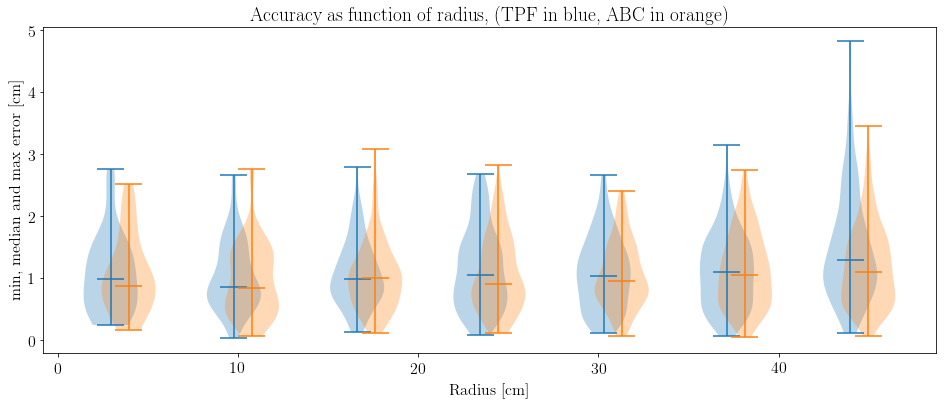

In [331]:
plt.figure(figsize=(16,6))
#for algo in algos:
#    plt.errorbar(bin_centers, bin_means[algo], yerr=bin_stds[algo], label=algo.replace('_', ' ').replace('PosRec', ''))
plt.violinplot(bin_vectors['PosRecTopPatternFit'], showmedians=True, widths=3, positions=bin_centers -0.5)
#plt.violinplot(bin_vectors['TPF_cor'], showmedians=True, widths=2, positions=bin_centers -0.5)
#plt.violinplot(bin_vectors['PosRecNeuralNet'], showmedians=True, widths=2, positions=bin_centers + 1)
plt.violinplot(bin_vectors['BOLFI_mean'], showmedians=True, widths=3, positions=bin_centers + 0.5)

#plt.legend()
plt.ylabel('min, median and max error [cm]')
plt.xlabel('Radius [cm]')
plt.title('Accuracy as function of radius, (TPF in blue, ABC in orange)')
#plt.savefig('FM2_violin_bc_25.png', dpi=150)
plt.show()

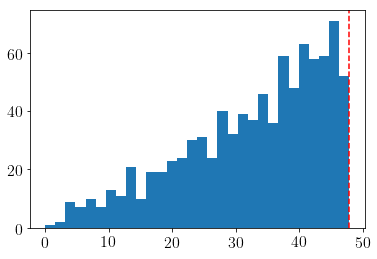

In [219]:
plt.figure()
plt.hist(df['truth_r'], bins=30, range=(0,47.9))
plt.axvline(47.9, color='r', linestyle='--')
plt.show()

In [75]:
#plt.figure(figsize=(8, 8))
#plt.scatter(df['truth_x'], df['truth_y'], s=4)
#plt.scatter(df['BOLFI_x'], df['BOLFI_y'], s=4)
#plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False))
#plt.gca().set_aspect(1)
#plt.xlim(-50, 50)
#plt.ylim(-50, 50)
#plt.show()

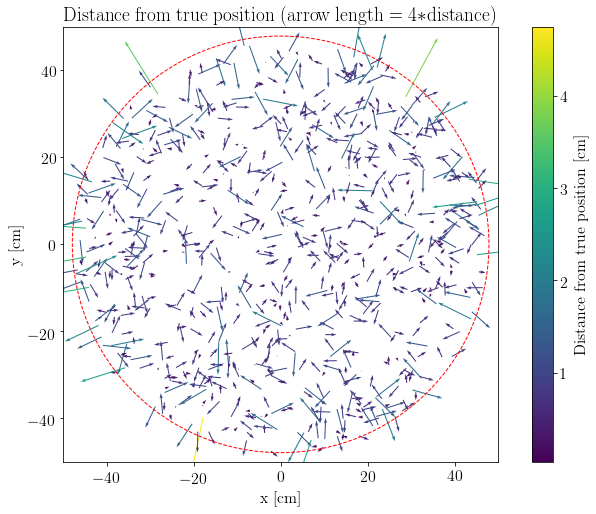

In [76]:
plt.figure(figsize =(12,8))
plt.quiver(df['truth_x'], df['truth_y'],
           df['PosRecTopPatternFit_x'] - df['truth_x'], df['PosRecTopPatternFit_y'] - df['truth_y'],
           df['PosRecTopPatternFit_d'],
           pivot='tail', angles='xy', scale_units='xy', scale=0.25)
plt.colorbar(label='Distance from true position [cm]')
plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False, linestyle='--'))
plt.gca().set_aspect(1)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Distance from true position (arrow length $= 4 * $distance)')
#plt.savefig('bolfi_vectors.png', dpi=150)
plt.show()

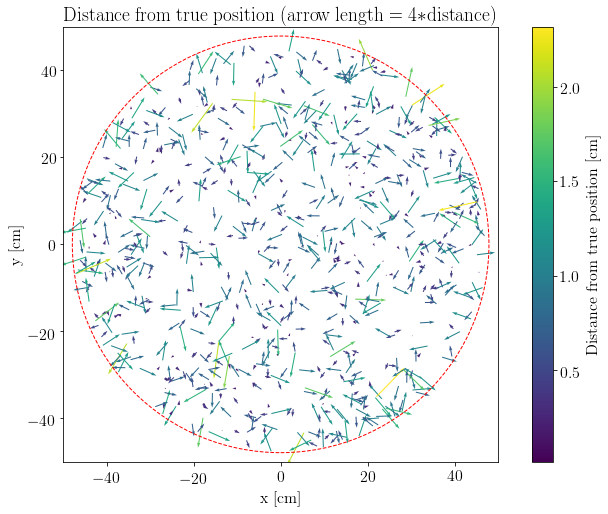

In [77]:
plt.figure(figsize =(12,8))
plt.quiver(df['truth_x'], df['truth_y'],
           df['BOLFI_mean_x'] - df['truth_x'], df['BOLFI_mean_y'] - df['truth_y'],
           df['BOLFI_mean_d'],
           pivot='tail', angles='xy', scale_units='xy', scale=0.25)
plt.colorbar(label='Distance from true position [cm]')
plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False, linestyle='--'))
plt.gca().set_aspect(1)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Distance from true position (arrow length $= 4 * $distance)')
#plt.savefig('bolfi_vectors.png', dpi=150)
plt.show()

In [84]:
from pax.plugins.io.WaveformSimulator import uniform_circle_rv

You don't have ROOT or root_pandas, root truth file output is disabled


In [89]:
xs, ys = uniform_circle_rv(n_samples=1000, radius=47.7)

In [90]:
xs = np.array(xs)
ys = np.array(ys)
rs = (xs**2 + ys**2)**0.5

In [91]:
#outer = rs > 30

In [93]:
#xs_outer = xs[outer]
#ys_outer = ys[outer]

In [94]:
rs.max()

47.680215845883566

In [95]:
len(xs[rs > 30])

631

In [96]:
with open('data/truepos_full.txt', 'w') as f:
    for i in range(len(xs)):
        f.write('%.5f %.5f\n' % (xs[i], ys[i]))

In [97]:
#
true_pos_test = np.loadtxt('data/truepos_full.txt')

In [100]:
true_pos_test.T

array([[-12.03792, -27.13142,  -7.94757, ...,  41.99333,  -8.66837,
          0.69514],
       [ -6.37732, -39.00569, -10.92799, ...,   9.40254, -10.9319 ,
         -2.64511]])

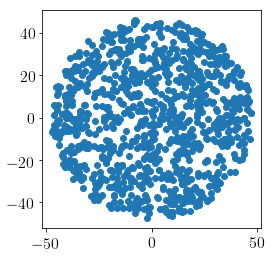

In [101]:
plt.scatter(true_pos_test.T[0], true_pos_test.T[1])
plt.gca().set_aspect(1)
plt.show()